In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.nunique()

Id                              27147
MW                                613
NumOfAtoms                         38
NumOfC                             10
NumOfO                             18
NumOfN                              3
NumHBondDonors                      7
NumOfConf                        1064
NumOfConfUsed                      40
parentspecies                       7
C.C..non.aromatic.                  3
C.C.C.O.in.non.aromatic.ring        3
hydroxyl..alkyl.                    6
aldehyde                            5
ketone                              6
carboxylic.acid                     4
ester                               3
ether..alicyclic.                   2
nitrate                             3
nitro                               3
aromatic.hydroxyl                   4
carbonylperoxynitrate               3
peroxide                            2
hydroperoxide                       5
carbonylperoxyacid                  4
nitroester                          3
pSat_Pa     

In [4]:
dataset.describe(include=(np.number))

,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,ether..alicyclic.,nitrate,nitro,aromatic.hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester,pSat_Pa
count,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,...,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,2.714700e+04
mean,74073.347957,264.436315,26.232843,6.860611,9.928390,1.060964,2.201643,229.643386,25.721921,0.092865,...,0.205142,0.665525,0.154050,0.001105,0.241389,0.279663,0.772977,0.259181,0.012451,5.708431e+01
std,47917.611394,49.858355,5.240883,1.451855,2.494574,0.712067,1.018979,202.905589,14.687277,0.290629,...,0.403813,0.673048,0.366171,0.047001,0.451312,0.448842,0.698533,0.467085,0.112537,5.928184e+03
min,0.000000,30.010565,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.624240e-14
25%,31724.500000,232.980781,23.000000,6.000000,8.000000,1.000000,2.000000,72.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659079e-06
50%,69861.000000,266.986260,26.000000,7.000000,10.000000,1.000000,2.000000,174.000000,30.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.552678e-04
75%,113432.000000,299.012475,30.000000,7.000000,12.000000,2.000000,3.000000,331.000000,40.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.974230e-03
max,166420.000000,386.044503,41.000000,10.000000,17.000000,2.000000,6.000000,1743.000000,40.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,7.324992e+05


In [6]:
missing_values = dataset.isnull().sum()
missing_values

Id                                0
MW                                0
NumOfAtoms                        0
NumOfC                            0
NumOfO                            0
NumOfN                            0
NumHBondDonors                    0
NumOfConf                         0
NumOfConfUsed                     0
parentspecies                   206
C.C..non.aromatic.                0
C.C.C.O.in.non.aromatic.ring      0
hydroxyl..alkyl.                  0
aldehyde                          0
ketone                            0
carboxylic.acid                   0
ester                             0
ether..alicyclic.                 0
nitrate                           0
nitro                             0
aromatic.hydroxyl                 0
carbonylperoxynitrate             0
peroxide                          0
hydroperoxide                     0
carbonylperoxyacid                0
nitroester                        0
pSat_Pa                           0
dtype: int64

In [9]:
dataset['pSat_Pa_log'] = np.log10(dataset['pSat_Pa'] + 1e-9)

In [10]:
unique_parentspecies = dataset['parentspecies'].nunique()
dataset_encoded = pd.get_dummies(dataset, columns=['parentspecies'])

dataset_encoded.head()

,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,nitroester,pSat_Pa,pSat_Pa_log,parentspecies_apin,parentspecies_apin_decane,parentspecies_apin_decane_toluene,parentspecies_apin_toluene,parentspecies_decane,parentspecies_decane_toluene,parentspecies_toluene
0,0,30.010565,4,1,1,0,0,1,1,0,...,0,641974.491,5.807518,False,False,True,False,False,False,False
1,1,74.995643,6,1,3,1,0,1,1,0,...,0,10295.712,4.012656,False,False,False,False,False,False,True
2,2,102.990558,8,2,4,1,0,2,2,0,...,0,13517.575,4.130899,False,False,False,False,False,False,True
3,3,118.985472,9,2,5,1,1,3,1,0,...,0,241.630,2.383151,False,False,False,False,False,False,True
4,4,134.980387,10,2,6,1,1,3,3,0,...,0,315.357,2.498802,False,False,False,False,False,False,True


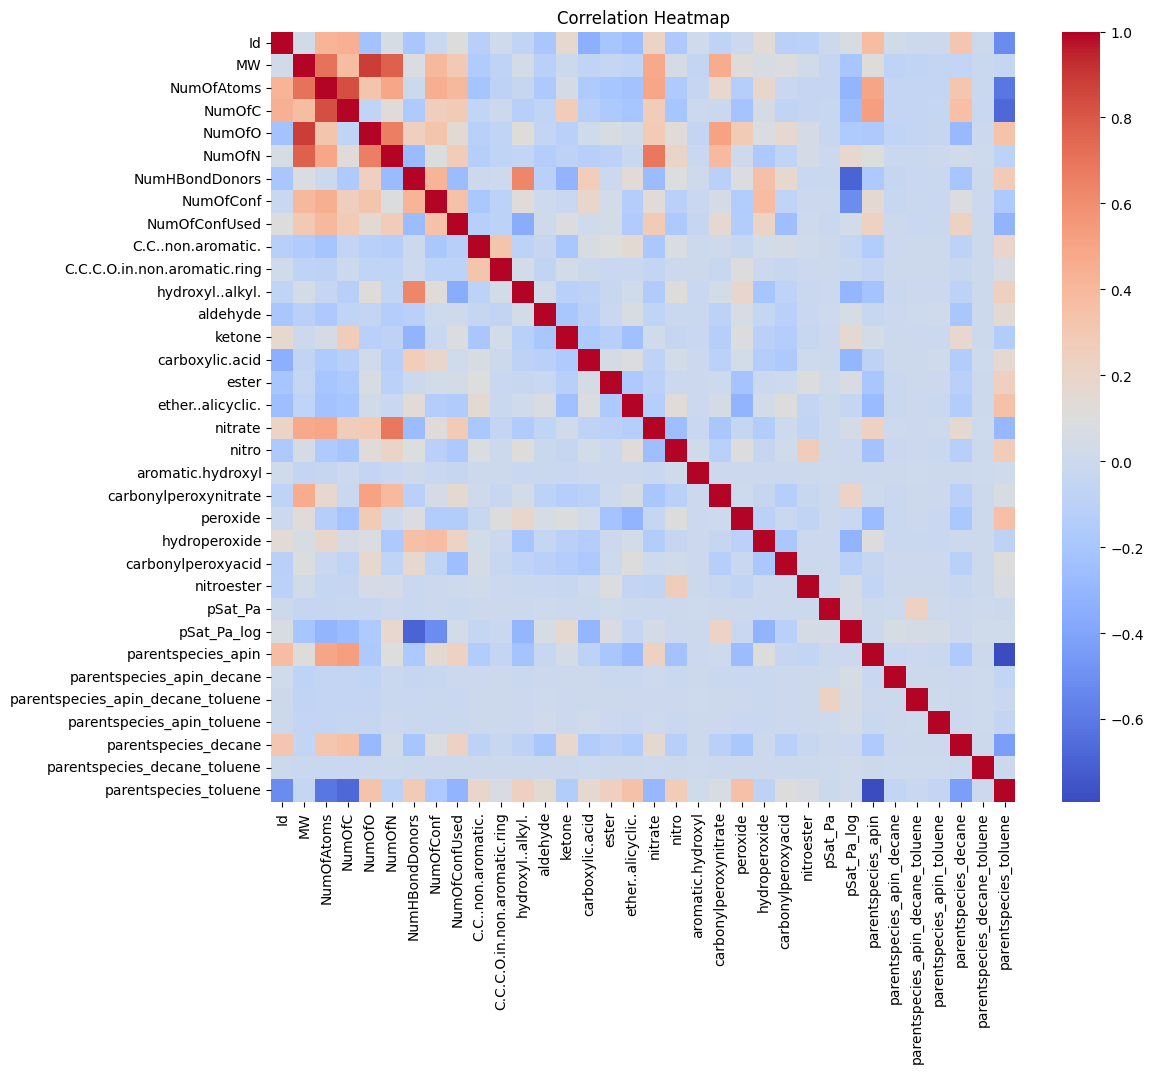

In [11]:
correlation_matrix = dataset_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

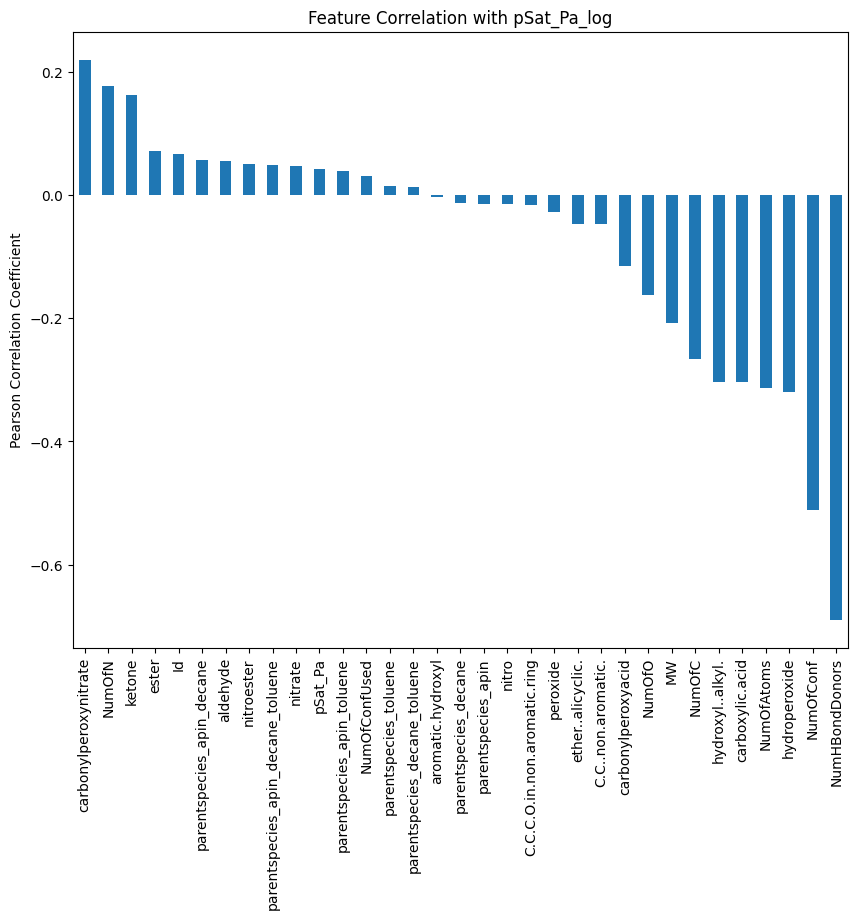

pSat_Pa_log                          1.000000
carbonylperoxynitrate                0.219608
NumOfN                               0.176541
ketone                               0.161770
ester                                0.070731
Id                                   0.065759
parentspecies_apin_decane            0.056103
aldehyde                             0.055687
nitroester                           0.050310
parentspecies_apin_decane_toluene    0.048640
nitrate                              0.047540
pSat_Pa                              0.042680
parentspecies_apin_toluene           0.038396
NumOfConfUsed                        0.030775
parentspecies_toluene                0.015137
parentspecies_decane_toluene         0.013448
aromatic.hydroxyl                   -0.003398
parentspecies_decane                -0.012690
parentspecies_apin                  -0.014238
nitro                               -0.014745
C.C.C.O.in.non.aromatic.ring        -0.016213
peroxide                          

In [12]:
correlation_with_target = dataset_encoded.corr()['pSat_Pa_log'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlation_with_target.drop('pSat_Pa_log').plot(kind='bar')
plt.title('Feature Correlation with pSat_Pa_log')
plt.ylabel('Pearson Correlation Coefficient')
plt.show()

correlation_with_target



The presence of both positive and negative correlations affecting the target variable indicates that a simple linear model might be insufficient due to its inability to capture non-linear patterns in the data. We should probably use non-linear models. Such as Random Forest, Gradient Boosting or Neural Networks. 

Before moving into our models,  we should probably create a baseline model which we can then use a reference point when we create our models. For linear regressions we could implement mean predict, which just predicts the mean of the target variable for all instances. They dont use any feature to make predictions so our model should do better than them. 

In [13]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa', "Id"], axis=1)
y = dataset_encoded['pSat_Pa_log']

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X, y)
mean_preds = dummy_mean.predict(X)
rmse_mean = np.sqrt(mean_squared_error(y, mean_preds))
r2_mean = r2_score(y, mean_preds)

dummy_median = DummyRegressor(strategy='median')
dummy_median.fit(X, y)
median_preds = dummy_median.predict(X)
rmse_median = np.sqrt(mean_squared_error(y, median_preds))
r2_median = r2_score(y, median_preds)

rmse_mean, r2_mean, rmse_median, r2_median


(np.float64(2.1341698960758944),
 0.0,
 np.float64(2.1343604355452865),
 -0.00017856870295029914)

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa',"Id"], axis=1)
y = dataset_encoded['pSat_Pa_log']

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f'RMSE scores for each fold: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'R² scores for each fold: {r2_scores}')
print(f'Average R²: {np.mean(r2_scores)}')

RMSE scores for each fold: [1.17871777 1.1532526  1.13398969 1.14632881 1.14404808]
Average RMSE: 1.1512673906507407
R² scores for each fold: [0.70056294 0.70368271 0.71838507 0.71250095 0.70936777]
Average R²: 0.7088998893996982


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa', 'Id'], axis=1)
y = dataset_encoded['pSat_Pa_log']

best_params = {
    'max_depth': 40,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 300
}

model = RandomForestRegressor(**best_params, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

neg_mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

avg_r2_score = np.mean(r2_scores)
avg_rmse_score = np.mean(rmse_scores)

print(f'Average RMSE Score from Cross-Validation: {avg_rmse_score}')
print(f'Average R² Score from Cross-Validation: {avg_r2_score}')



Average RMSE Score from Cross-Validation: 1.1060339036242313
Average R² Score from Cross-Validation: 0.7313165129738677


In [30]:
import pandas as pd

# Load the test data from a CSV file (assuming it's in CSV format)
test_data = pd.read_csv("test.csv")

# Separate features (X) and target variable (y) if the target variable is included

In [31]:
X_test = test_data.drop(['Id'], axis=1) 

In [32]:
model.fit(X, y)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_split=4,
                      n_estimators=300, random_state=42)

In [37]:
# Identify the missing columns in the test set that were present in the training set
missing_cols = set(X.columns) - set(X_test.columns)

# Add the missing columns to the test set with default values (e.g., 0)
for col in missing_cols:
    X_test[col] = 0

# Ensure the order of columns in the test set matches the training set
X_test_aligned = X_test[X.columns]

# Now, you can make predictions
predictions = model.predict(X_test_aligned)
predictions

array([ 1.03796629, -1.59380493, -2.50991667, ..., -4.89917181,
       -4.00560447, -3.4856071 ])

In [38]:
output = pd.DataFrame({'Id': test_data['Id'], 'Predicted_pSat_Pa_log': predictions})
output.to_csv("predictions.csv", index=False)